### **ECON 323 FINAL PROJECT**

### **PARLIAMENTARY PARTICIPATION AND ELECTORAL SUCCESS**

##### INTRODUCTION

In this project, we aim to further contribute to my ECON 490 paper. The project adds to the paper by creating interactive visualizations that explain the variables and by carrying out classification tasks through machine learning.  

ADD EXTRA INFORMATION ABOUT THE SPECIFICS OF THE MACHINE LEARNING

The paper explores the impact of parliamentary participation on electoral success particularly in the Canadian House of Commons. In this case, parliamentary participation is measured by participation in question period and statements made in the House of Commons and the private member bills introduced by the Member of Parliament. Electoral success is measured by whether or not the Member of Parliament was reelected in the next federal elections. 

##### LOADING PACKAGES

We start by loading all the necessary packages:

In [5]:
import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as colors
import folium 
from folium import plugins
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

##### INTRODUCING THE DATA 

##### *Reading the Data*

For my 490 paper, I worked with two csv files which include data from several sources:

- Elections Canada for reelection and riding information
- OurCommons website for information on Private Member's Bills, statements made and Cabinet ministers
- SQL Database from the openparliament.com website for gender, party and politician name
- Conservative.ca website for information on Shadow Cabinet
- Age and years in House of Commons from Parl.ca website 

The overall timeframe for this data is from the 2015 federal elections to the 2021 federal elections i.e. the information considers all parliamentary activity from the 42nd and 43rd Parliament.

In [4]:
# reading in csv data 
results15 = pd.read_csv("DATA/2015Results.csv")
results19 = pd.read_csv("DATA/2019Results.csv")

# renaming columns so that dataframes can be concatenated correctly 
results15 = results15.rename(columns = {"RidingID":"Riding ID", "ranfor43":"RanForNE", "reelected43":"Reelected", "DOB1":"DOB", "YearsServedAtTimeOfElection":"YearsInHOC"})
results19 = results19.rename(columns = {"Election":"Parliament", "ranfor44":"RanForNE", "reelected44":"Reelected", "StatementsByMembers":"Statements", "YearsServedAtElection":"YearsInHOC"})

# concatenating dataframes
Results_Full = pd.concat([results15, results19], ignore_index=True)

##### *Creating Dummy Variables*

Next, we create dummy variables for the following categorical variables and add them to the original dataframe. Some further clean-up takes place for clarity.

In [35]:
# creating a dataframe with columns that need to be converted to dummy variables
Results_Dummy = pd.DataFrame(data=Results_Full, columns=['Gender', 'RanForNE', 'Reelected', 'Party'])

# creating dummy variables for each column of the above dataset
Dummies = pd.get_dummies(Results_Dummy)

# adding newly created dummy variables to the original dataframe
Results = pd.concat([Results_Full, Dummies], axis = 1)

# removing unnecessary columns
Results = Results.drop(columns=['Gender', 'RanForNE', 'Reelected', 'DOB', 'Gender_M', 'RanForNE_No', 'Reelected_.', 'Reelected_No', 'Party_Bloc Québécois', 'Party_Green Party of Canada', 'Party_Independent'])

# renaming columns for better understanding
Results = Results.rename(columns = {"Gender_F":"Gender", "RanForNE_Yes":"RanForNE", "Reelected_Yes":"Reelected", "Party_Conservative Party of Canada":"ConservativeMem", "Party_Liberal Party of Canada":"LiberalMem", "Party_New Democratic Party":"NDPMem"})

##### VISUALIZING THE ELECTORAL RESULTS 

Now, we visualise the electoral results for the 2019 and 2021 federal elections on an interactive map. The map is split into different ridings with each riding provided information on whether or not the MP ran for re-election and the election results if they did run for reelection.

We do this using a shapefile from the federal electoral discticts map from Government of Canada.

In [36]:
# defining a function that gives an outcome based on values for dummy variables
def f(row):
    if row['RanForNE'] == row['Reelected'] == 1:
        val = 'Ran for Re-election and Won'
    elif row['RanForNE'] == 0:
        val = 'Did Not Run for Re-election'
    else:
        val = 'Ran for Re-election and Lost'
    return val

# creating a dataframe with only necessary columns
#PlottingDF = pd.DataFrame(data=Results, columns=['Name', 'Parliament', 'Riding ID', 'RanForNE', 'Reelected'])

# applying the function to the newly created dataframe
Results['Outcome'] = Results.apply(f, axis=1)

# splitting the dataframe - corresponding to each election
# results for 2019 election
Plotting19 = Results.loc[Results['Parliament'] == 42]
# results for 2021 election
Plotting21 = Results.loc[Results['Parliament'] == 43] 

In [37]:
# loading in the shapefile
Ridings = gpd.read_file('FED_CA_2021_EN/FED_CA_2021_EN.shp')

# renaming the column so that the dataframes can be merged based on Riding ID
Ridings = Ridings.rename(columns = {"FED_NUM":"Riding ID", "ED_NAMEE":"Electoral District"})

# merging so that we have an outcome for each electoral riding
map2019 = pd.merge(Ridings, Plotting19, on = 'Riding ID')
map2021 = pd.merge(Ridings, Plotting21, on = 'Riding ID')

DriverError: FED_CA_2021_EN/FED_CA_2021_EN.shp: No such file or directory

In [ ]:
# creating map for 2019 federal election
map2019.explore(
     column="Outcome",
     tooltip="Outcome",
     popup = ['Name', 'Electoral District', 'Outcome'],
     cmap="Paired",
     style_kwds=dict(color="black") 
    )

In [ ]:
# creating map for 2021 federal election
map2021.explore(
     column="Outcome",
     tooltip="Outcome",
     popup = ['Name', 'Electoral District', 'Outcome'],
     cmap="Paired",
     style_kwds=dict(color="black") 
    )

##### PREDICTION BY LOGISTIC REGRESSION MODEL IN MACHINE LEARNING

Since the dependent variable in our model is a binary variable. So using Logistic Regression Model to train and test our dataset for classification is an appropriate choice. We would test which regressors in the dataset would contribute to the accuracy of 3 different logistic regression model.

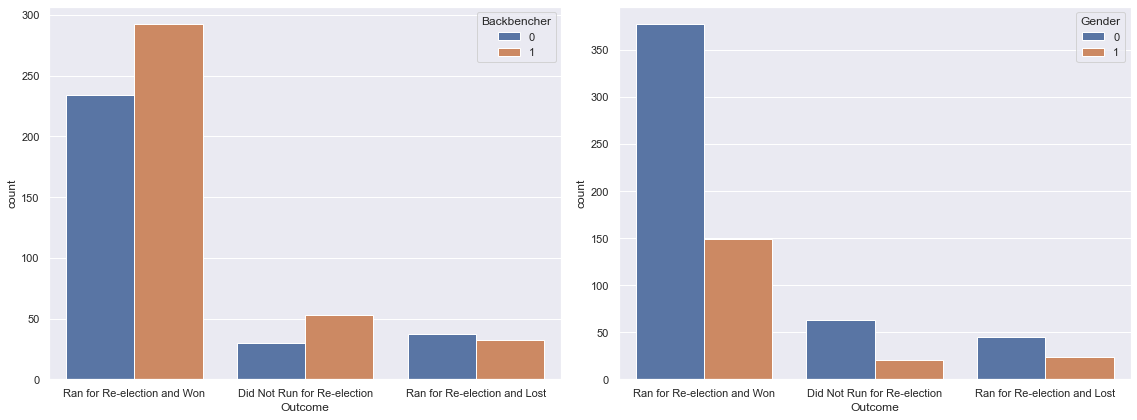

In [31]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(x="Outcome", hue = 'Backbencher', ax=ax[0], data=Results)
sns.countplot(x="Outcome", hue = 'Gender', ax=ax[1], data=Results)

plt.tight_layout()

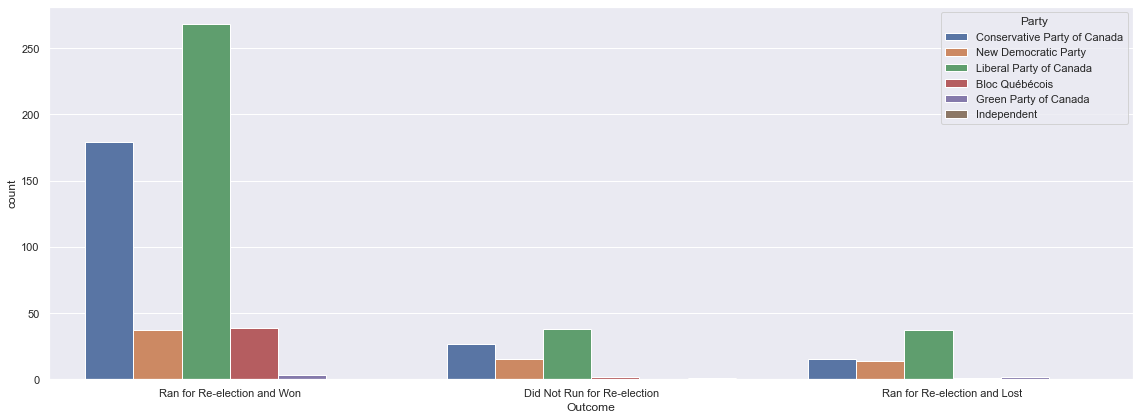

In [41]:
fig, ax = plt.subplots(figsize = (16,6))
sns.countplot(x="Outcome", hue = 'Party', data=Results)
plt.tight_layout()

##### Data Exploration and Preparation

In [ ]:
QuestionPeriod_hist = Results.hist(column = ["QuestionPeriod"], figsize = (6,4),legend = True, bins = 100, grid = False)
Results['QuestionPeriod'].max()

As we could see from the histogram above,the distribution is left-skewed. And the maximum Question asked per period is $3208$, which is the number of question answered by Justin Trudeau. We decide to delete this maximum column and convert add a column for Log Questions. Therefore, we would have a close to normal data for regression analysis.  
// Editing needed. Question asked or Question answered?

##### Dropping the row contains the outlier

In [ ]:
# creating a log of the QuestionPeriod variable
Results['QuestionsLog'] = np.log10(Results['QuestionPeriod'])
# Drop the rows that the Log Quesitions has negative values. 
Results = Results.loc[Results['QuestionPeriod'] >= 1]
# Find the index of Justin Trudeau and confirm the index
Results['QuestionPeriod'].idxmax()
Results.loc[80]
# Drop the row of Justin Trudeau's data
Results = Results.drop([80])
# Reset the index
Results = Results.reset_index()

##### LogQuestion Plot

In [ ]:
LogQuestionPeriod_hist = Results.hist(column = ["QuestionsLog"], figsize = (6,4),legend = True, bins = 100, grid = False)

##### Checking for Missing Values in the Dataframe

In [ ]:
# checking for NaN values in the dataframe
Results.isnull().sum()
Results.AgeOnElectionDay.isnull().sum()
Results.AgeOnElectionDay.mean()

##### Impute the Missing Value with Column Average

In [ ]:
# impute the missing AgeOnElectionDay values with mean
Results['AgeOnElectionDay'].fillna((Results['AgeOnElectionDay'].mean()), inplace=True)
# check the dataframe for missing value again
Results.AgeOnElectionDay.isnull().sum()

#### Trainning Set and Testing Set

Randomly Select 80% of data among 2015 and 2019 data set as Trainning Set, 20% as Testing Set. /
Due to the nature of the original data, 2015's dataset was collected for a 4-year period and 2019's dataset only collected for a 2-year period. Therefore, the mean averages for 2 datasets in numerical explanatary variables have around twice the difference. Therefore, randomly select in the combined dataset would be a reasonable choice in the training and testing model.



In [ ]:
Randomly Select 80% of data among 2015 and 2019 data set as Trainning Set, 20% as Testing Set.
train= Results.sample(frac = 0.8, random_state = 123)
test= Results.drop(train.index)
# Check if the sample size match after splitting
print(train.shape[0] + test.shape[0] == Results.shape[0])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(train.drop('Reelected',axis=1), 
                                                    #train['Reelected'], test_size=0.20, 
                                                    #random_state=123)

##### Model 1
Regressors: Question Asked (Log), Private Number Bills Proposed,  Statements Made.
- This regression has the following variables - log Question Period participation (calculated as the number of times an MP spoke in the Question Period), private member bills sponsored by the MP and the number of statements made in the House of Commons. 

In [ ]:
# Prep Model 1 df
# use QuestionPeriod or QuestionLog
train_model_1 = train[['QuestionPeriod','PvtMemBills','Statements','Reelected']]
train_model_1
test_model_1 = test[['QuestionPeriod','PvtMemBills','Statements','Reelected']]
test_model_1

In [ ]:
X_train_model_1, X_test_model_1, y_train_model_1, y_test_model_1 = train_test_split(train_model_1.drop('Reelected',axis=1), 
                                                    train_model_1['Reelected'], test_size=0.20, 
                                                    random_state=123)

In [ ]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train_model_1,y_train_model_1)
predictions_model_1 = logmodel_1.predict(X_test_model_1)
print(classification_report(y_test_model_1,predictions_model_1))

In [ ]:
# above table already has the accuracy score, 0.70
score_model_1 = accuracy_score(y_test_model_1,predictions_model_1)
score_model_1

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_model_1, predictions_model_1)

##### Model 2
Regressors: Question Asked (Log), Private Number Bills Proposed,  Statements Made, Gender, Age.
- Variables related to personal characterstics are added to the previous regression. These include gender of the MP and their age at the time of the election. 

In [ ]:
# Prep Model 2 df
# use QuestionPeriod or QuestionLog
train_model_2 = train[['QuestionPeriod','PvtMemBills','Statements','Reelected','AgeOnElectionDay','Gender']]
train_model_2
test_model_2 = test[['QuestionPeriod','PvtMemBills','Statements','Reelected','AgeOnElectionDay','Gender']]
test_model_2

In [ ]:
X_train_model_2, X_test_model_2, y_train_model_2, y_test_model_2 = train_test_split(train_model_2.drop('Reelected',axis=1), 
                                                    train_model_2['Reelected'], test_size=0.20, 
                                                    random_state=123)

In [ ]:
logmodel_2 = LogisticRegression()
logmodel_2.fit(X_train_model_2,y_train_model_2)
predictions_model_2 = logmodel_2.predict(X_test_model_2)
print(classification_report(y_test_model_2,predictions_model_2))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_model_2, predictions_model_2)

#### Model 3
Regressors: Question Asked (Log), Private Number Bills Proposed, Statements Made, Gender, Age, Years in House of Commons, Conservative Member, Liberal Member, NDP Member, Backbencher.
- This time, we add political characterstics to the mix. This includes the number of years the MP has served to the House of Commons, and dummy variables that inform whether the MP is a member of the Conservative Party, Liberal Party or the New Democratic Party.

In [ ]:
# Prep Model 3 df
# use QuestionPeriod or QuestionLog
#!!!! Having problem with adding Backbencher, datatype is int, not uint8
# !!!!!!
train_model_3 = train[['QuestionPeriod','PvtMemBills','Statements','Reelected','AgeOnElectionDay','Gender','YearsInHOC','ConservativeMem','LiberalMem','NDPMem']]
train_model_3
test_model_3 = test[['QuestionPeriod','PvtMemBills','Statements','Reelected','AgeOnElectionDay','Gender','YearsInHOC','ConservativeMem','LiberalMem','NDPMem']]
test_model_3

In [ ]:
X_train_model_3, X_test_model_3, y_train_model_3, y_test_model_3 = train_test_split(train_model_3.drop('Reelected',axis=1), 
                                                    train_model_3['Reelected'], test_size=0.20, 
                                                    random_state=123)

In [ ]:
logmodel_3 = LogisticRegression()
logmodel_3.fit(X_train_model_3,y_train_model_3)
predictions_model_3 = logmodel_3.predict(X_test_model_3)
print(classification_report(y_test_model_3,predictions_model_3))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_model_3, predictions_model_3)

#### Evaluation
Comparing 3 Logistic Regression Models presented above, as we increasing the number of relevent regressors, Model 1 and Model 2 have the same prediction accuracy (70%). However, in Model 3, with more explanatory variables added, the model's prediction accuracy decreased slightly (69%). Model 2 and Model 3 might be overfitting as the number of regressors increased. Added explanatary variables did not provide extra information in prediciton of the re-election results. The time period difference for 2015 and 2019 datasets could also contribute to the accuracy of our prediction model. If the 2019 data set has the same time period as 2015 dataset, the independent numeriacal variables in 2019 would provide more information in terms of predicting re-election results. So the model prediction accuracy might be improved.